In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

housing_data = pd.read_csv('housing.csv')

In [4]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# Check for missing values
print(housing_data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [7]:
# Fill in missing values with average values
housing_data.fillna(housing_data.mean(), inplace=True)

In [8]:
print(housing_data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [9]:
# Delete duplicate rows
housing_data.drop_duplicates(inplace=True)

<function matplotlib.pyplot.show(*args, **kw)>

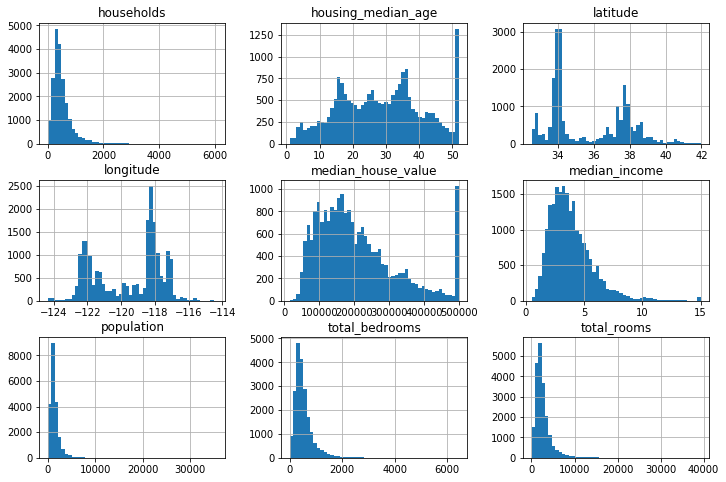

In [10]:
housing_data.hist(bins=50, figsize=(12, 8))
plt.show

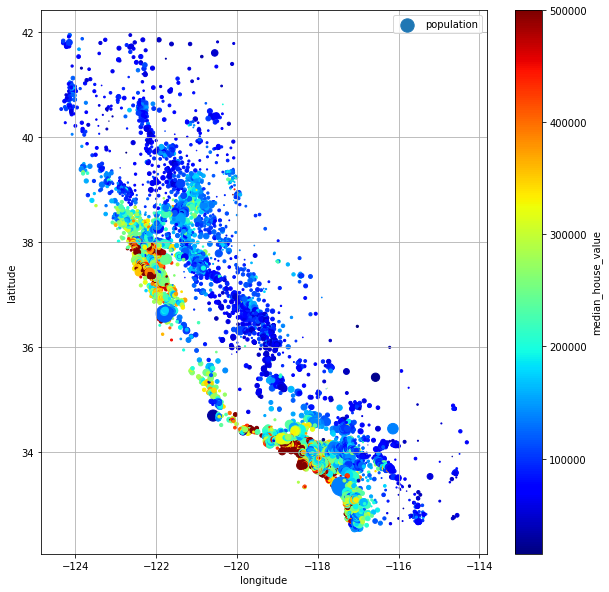

In [11]:
#Address information of the house
housing_data.plot(kind="scatter", x="longitude", y="latitude",grid=True,
          s=housing_data["population"] / 100, label="population", 
          c="median_house_value", cmap="jet", colorbar=True,  
          legend=True, sharex=False, figsize=(10,10))
plt.show()

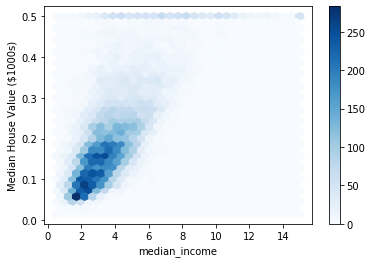

In [21]:
plt.hexbin(x=housing_data['median_income'], y=housing_data['median_house_value'], gridsize=30, cmap='Blues')
plt.colorbar()
plt.xlabel('median_income')
plt.ylabel('Median House Value ($1000s)')
plt.show()

Text(0, 0.5, 'Latitude')

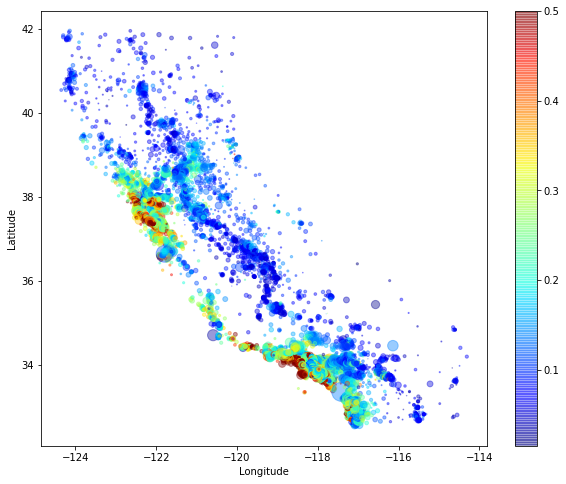

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 提取经度和纬度特征，并进行标准化处理
X = housing_data[['longitude', 'latitude']].values
y = housing_data['median_house_value'].values

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# 构建线性回归模型，并拟合数据
lr = LinearRegression(fit_intercept=True)
lr.fit(X_std, y)

# 绘制拟合结果
plt.figure(figsize=(10, 8))
plt.scatter(housing_data['longitude'], housing_data['latitude'],
           s=housing_data['population']/100, c=housing_data['median_house_value'],
           cmap='jet', alpha=0.4)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')



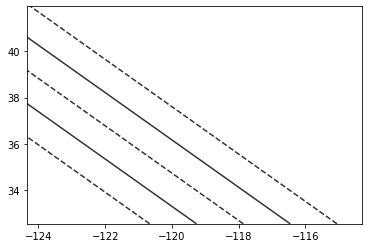

In [40]:
# 绘制线性拟合直线
x_min, x_max = housing_data['longitude'].min(), housing_data['longitude'].max()
y_min, y_max = housing_data['latitude'].min(), housing_data['latitude'].max()

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 10), np.linspace(y_min, y_max, 10))
V = lr.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
V = V.reshape(xx.shape)
plt.contour(xx, yy, V, levels=[0.10, 0.20, 0.30, 0.40, 0.50], colors='k',
            linestyles=['--', '-', '--', '-', '--'], alpha=0.8)

plt.show()
